<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


*   Visualize the distribution of data.

*   Visualize the relationship between two features.

*   Visualize composition of data.

*   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [ ]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

Connect to the database.


In [1]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [2]:
import pandas as pd
import numpy as np

## Demo: How to run an sql query


In [10]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT *
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.isnull().sum()

index             0
Respondent        0
MainBranch        0
Hobbyist          0
OpenSourcer       0
               ... 
Age             287
Trans           123
Dependents      140
SurveyLength     19
SurveyEase       14
Length: 63, dtype: int64

## Demo: How to list all tables


In [ ]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


## Demo: How to run a group by query


In [ ]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

## Demo: How to describe a table


In [ ]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

# Hands-on Lab


## Visualizing distribution of data


In [3]:
import matplotlib.pyplot as plt

### Histograms


Plot a histogram of `ConvertedComp.`


In [4]:
# your code goes here
query1 = """
select ConvertedComp from master
"""
df1 = pd.read_sql_query(query1,conn)
df1.dropna(inplace =True)


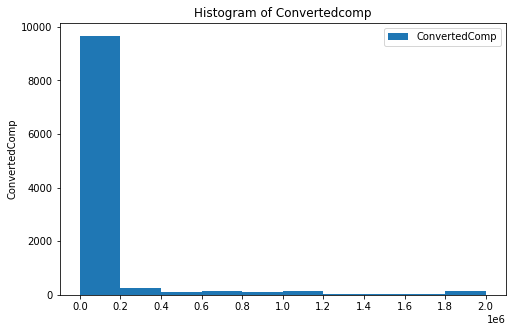

In [5]:
count, bin_edges = np.histogram(df1)

df1.plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

# add a title to the histogram
plt.title('Histogram of Convertedcomp')
plt.ylabel('ConvertedComp')
plt.show()

### Box Plots


Plot a box plot of `Age.`


In [6]:
# your code goes here
query2 = """
select Age
from master
"""
df2 = pd.read_sql_query(query2,conn)
df2.dropna(inplace = True)

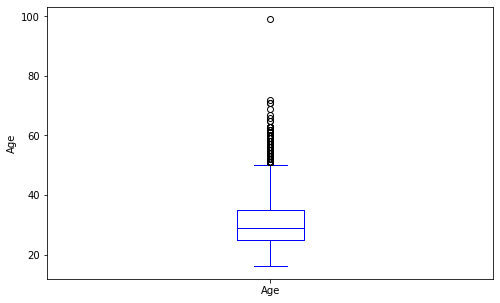

In [33]:
df2.plot(kind='box',color = 'blue',  figsize = (8,5))
plt.ylabel('Age')
plt.show()

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


In [7]:
# your code goes here
query3 = """
select Age, WorkWeekHrs
from master
"""
df3 = pd.read_sql_query(query3,conn)
df3.dropna(inplace = True)

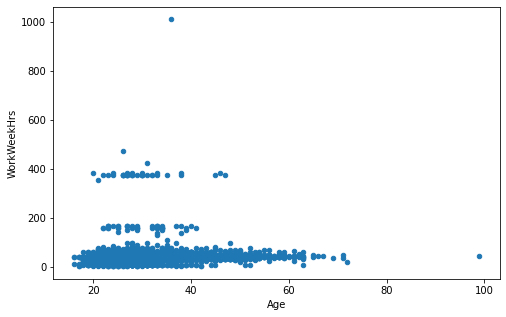

In [8]:
df3.plot(kind='scatter', x = 'Age', y = 'WorkWeekHrs', figsize= (8,5))
plt.show()

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


In [9]:
# your code goes here
query4 = """
select WorkWeekHrs, CodeRevHrs, Age
from master
"""
df4 = pd.read_sql_query(query4,conn)
df4.dropna(inplace = True)

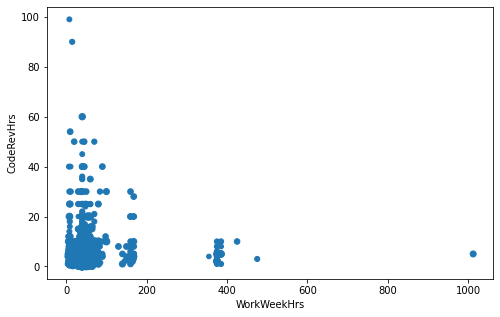

In [10]:
df4.plot(kind='scatter', x = 'WorkWeekHrs', y = 'CodeRevHrs', s = 'Age', figsize =(8,5))
plt.show()

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


In [11]:
# your code goes here

query5 = """
select LanguageDesireNextYear
from LanguageDesireNextYear
"""
df5 = pd.read_sql_query(query5,conn)
df5_new = df5.value_counts().sort_values(ascending=False).head()

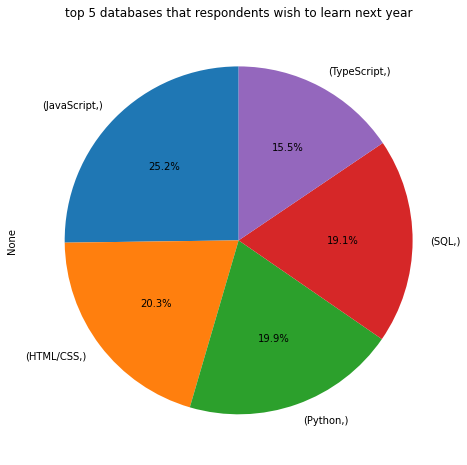

In [13]:
df5_new.plot(kind='pie',
             autopct='%1.1f%%', 
             startangle=90,    
             figsize = (10,8))
plt.title('top 5 databases that respondents wish to learn next year')
plt.show()

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


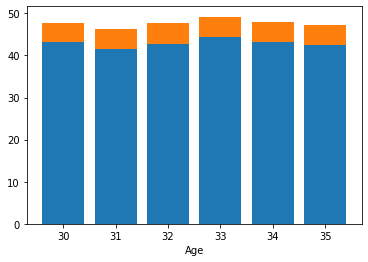

In [27]:
# your code goes here
query6 = """
SELECT Avg(WorkWeekHrs), Avg(CodeRevHrs), Age 
FROM master 
where Age between 30 and 35
group by Age
"""
df6 = pd.read_sql_query(query6,conn)
WorkWeekHrs= df6['Avg(WorkWeekHrs)']
CodeRevHrs= df6['Avg(CodeRevHrs)']
Age= df6['Age']

fig, ax = plt.subplots()

ax.bar(Age, WorkWeekHrs, label='WorkWeekHrs')
ax.bar(Age, CodeRevHrs, bottom=WorkWeekHrs,
       label='CodeRevHrs')
plt.xlabel('Age')
plt.show()

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


    Avg(ConvertedComp)   Age
0        187374.012821  45.0
1        231703.737705  46.0
2        142093.126984  47.0
3        157251.532258  48.0
4        214709.000000  49.0
5        143120.464286  50.0
6        123404.666667  51.0
7        255217.236842  52.0
8        257196.758621  53.0
9        144287.041667  54.0
10       150508.583333  55.0
11       107843.357143  56.0
12       127548.700000  57.0
13       332839.833333  58.0
14       350231.800000  59.0
15       132287.500000  60.0


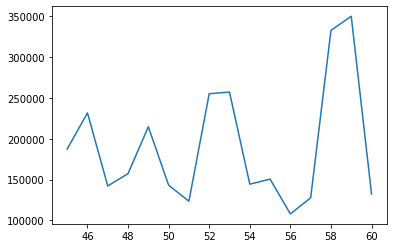

In [29]:
# your code goes here

query7= """
SELECT Avg(ConvertedComp), Age
FROM master
where age between 45 and 60
group by Age
"""
df7= pd.read_sql_query(query7, conn)
plt.plot(df7['Age'],df7['Avg(ConvertedComp)'])
print(df7)

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


,MainBranch,count(*)
0,I am a developer by profession,10618
1,"I am not primarily a developer, but I write co...",780


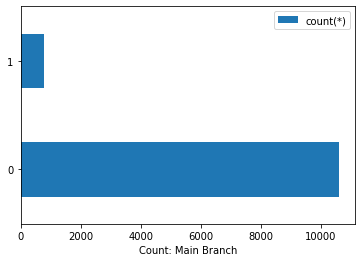

In [31]:
# your code goes here

query8="""
SELECT MainBranch, count(*)
FROM master
group by MainBranch
"""
df8=pd.read_sql_query(query8, conn)
df8.plot(kind='barh')
plt.xlabel('Count: Main Branch')
df8

Close the database connection.


In [32]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
